# Rugby Data Experiment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

pd.options.mode.chained_assignment = None  # default='warn'

In [14]:
rugby = pd.read_csv("RugbyData.csv")
rugby.head(5)

,Team1,Score1,Score2,Team2,Year
0,Scotland,27,22,Ireland,2017
1,England,19,16,France,2017
2,Italy,7,33,Wales,2017
3,Italy,10,63,Ireland,2017
4,Wales,16,21,England,2017


## All_Scores is a series made from the Score1 and Score2 columns

In [15]:
All_Scores = rugby['Score1'].append(rugby['Score2'])
All_Scores

0      27
1      19
2       7
3      10
4      16
5      22
6      29
7      19
8      36
9      22
10     18
11     61
12     29
13     20
14     13
15     23
16      9
17     16
18     10
19     27
20      9
21     19
22     20
23     21
24     58
25     25
26     29
27     67
28     35
29     21
       ..
108    36
109    28
110    17
111    16
112    14
113     9
114    21
115    10
116    16
117    17
118     9
119    19
120     7
121    10
122    11
123    18
124    10
125    18
126     9
127    17
128    22
129    24
130    19
131    13
132    43
133    34
134    20
135    29
136    13
137    17
Length: 276, dtype: int64

## Countplot for scores

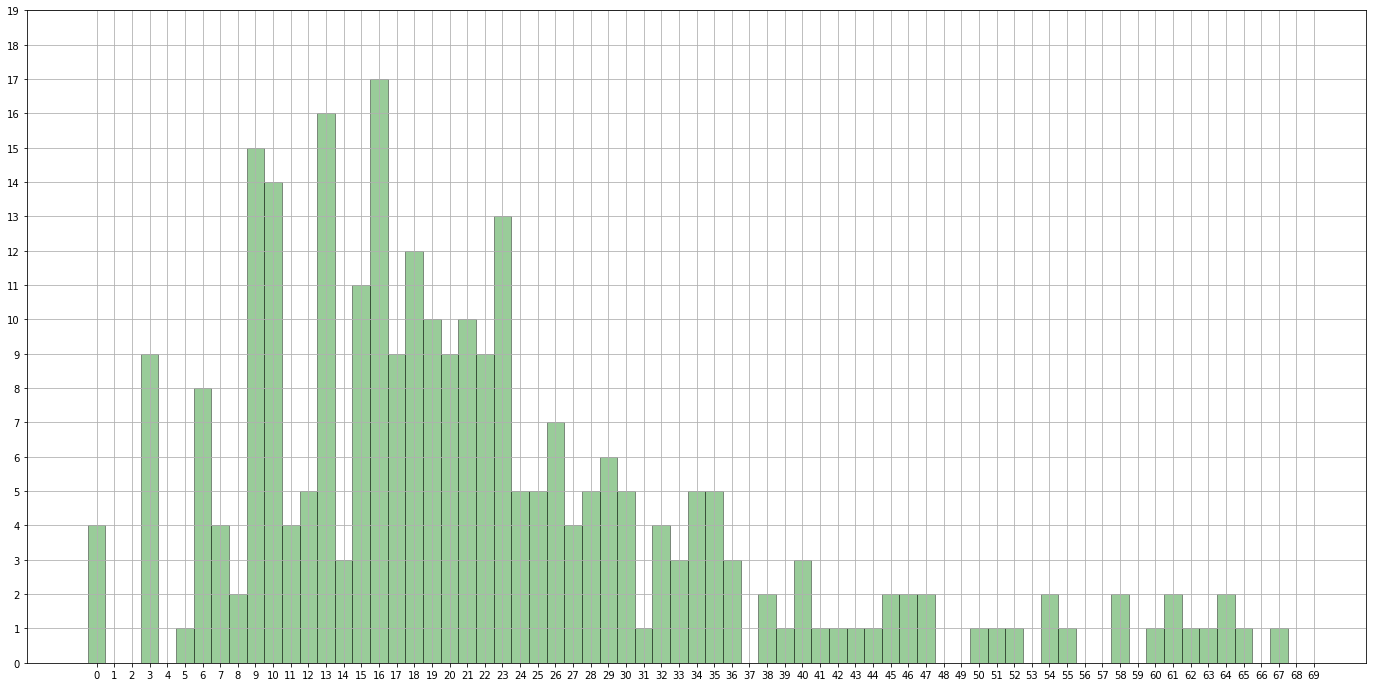

In [25]:
fig1 = plt.figure(figsize=(24,12))
ax = sns.distplot(All_Scores, bins=np.arange(70)-0.5, kde=False, color = 'g')
ax.set(xticks=range(0,70))
ax.set(yticks=range(0,20))
ax.grid()

In [88]:
most_freq = All_Scores.value_counts()
for score, count in most_freq.head(10).iteritems():
    print("{} has occurred {} times".format(score, count))

16 has occurred 17 times
13 has occurred 16 times
9 has occurred 15 times
10 has occurred 14 times
23 has occurred 13 times
18 has occurred 12 times
15 has occurred 11 times
19 has occurred 10 times
21 has occurred 10 times
20 has occurred 9 times


#### Common scores seen in the ranges 9-10, 12-13, 15-23, 26-30

## Team Specifics

## Function to return match history of 2 teams

In [73]:
def match_history(country1, country2):
    games1 = rugby[(rugby['Team1']==country1) & (rugby['Team2']==country2)]
    games2 = rugby[(rugby['Team2']==country1) & (rugby['Team1']==country2)]
    c = games2.columns
    games2[[c[0], c[3]]] = games2[[c[3], c[0]]]
    games2[[c[1], c[2]]] = games2[[c[2], c[1]]]
    games = games1.append(games2)
    games.sort_index(inplace=True)
    return games

In [74]:
mh = match_history("Wales", "England")
mh

,Team1,Score1,Score2,Team2,Year
4,Wales,16,21,England,2017
25,Wales,21,25,England,2016
30,Wales,16,21,England,2015
56,Wales,18,29,England,2014
73,Wales,30,3,England,2013
82,Wales,19,12,England,2012
93,Wales,28,25,England,2015


In [81]:
print("Mean scores are {} {}".format(mh['Score1'].mean(), mh['Score2'].mean()))

Mean scores are 21.142857142857142 19.428571428571427


#### Here we will create a regression plot of the scores from a pair of teams' match history

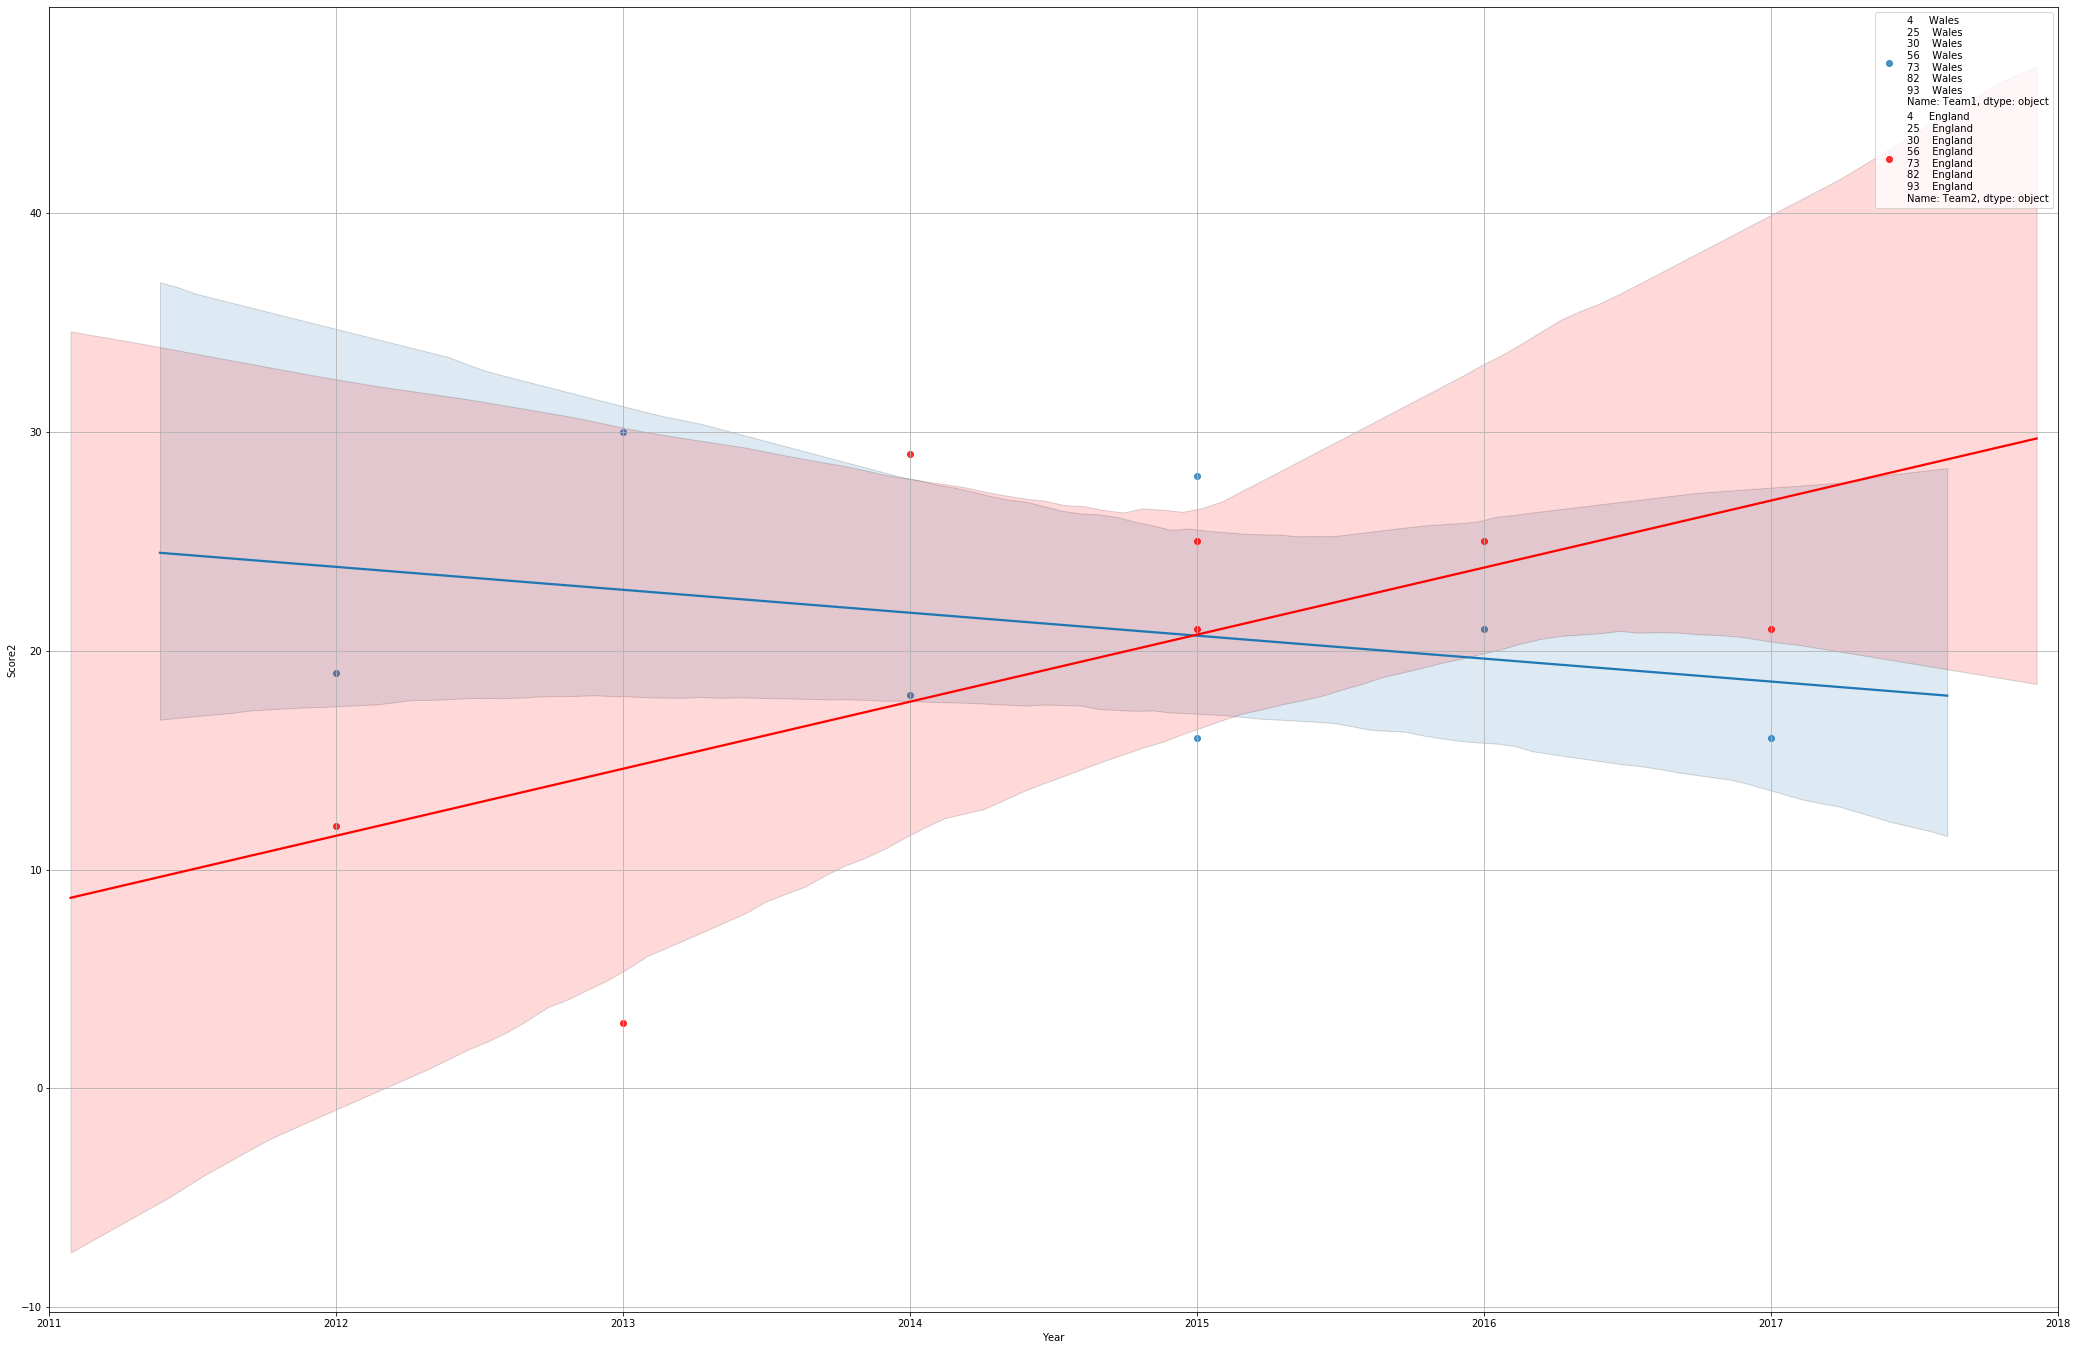

In [86]:
fig, ax = plt.subplots(figsize=(36,24))
p = sns.regplot(x='Year', y='Score1', data=mh, ax=ax, label=mh['Team1'])
p2 = sns.regplot(x='Year', y='Score2', data=mh, ax=ax, label=mh['Team2'], color='r')
plt.xlim(2011, 2018)
ax.grid()
ax.legend(loc="best")